In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from dython.nominal import associations
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('./MBA.csv')
df['race'] = df['race'].replace({'Other': 'international student', np.nan: 'international student'})
df['admission'] = df['admission'].replace({np.nan: 'Deny'})
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


## 1. Data Summary

In [3]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None


In [4]:
print(df.describe())  # Summary statistics of numerical features

       application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       1788.198115     0.151541    49.294883     1.032432
min          1.000000     2.650000   570.000000     1.000000
25%       1549.250000     3.150000   610.000000     4.000000
50%       3097.500000     3.250000   650.000000     5.000000
75%       4645.750000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000


## 2. Univariate Analysis

### a. Numerical Variables

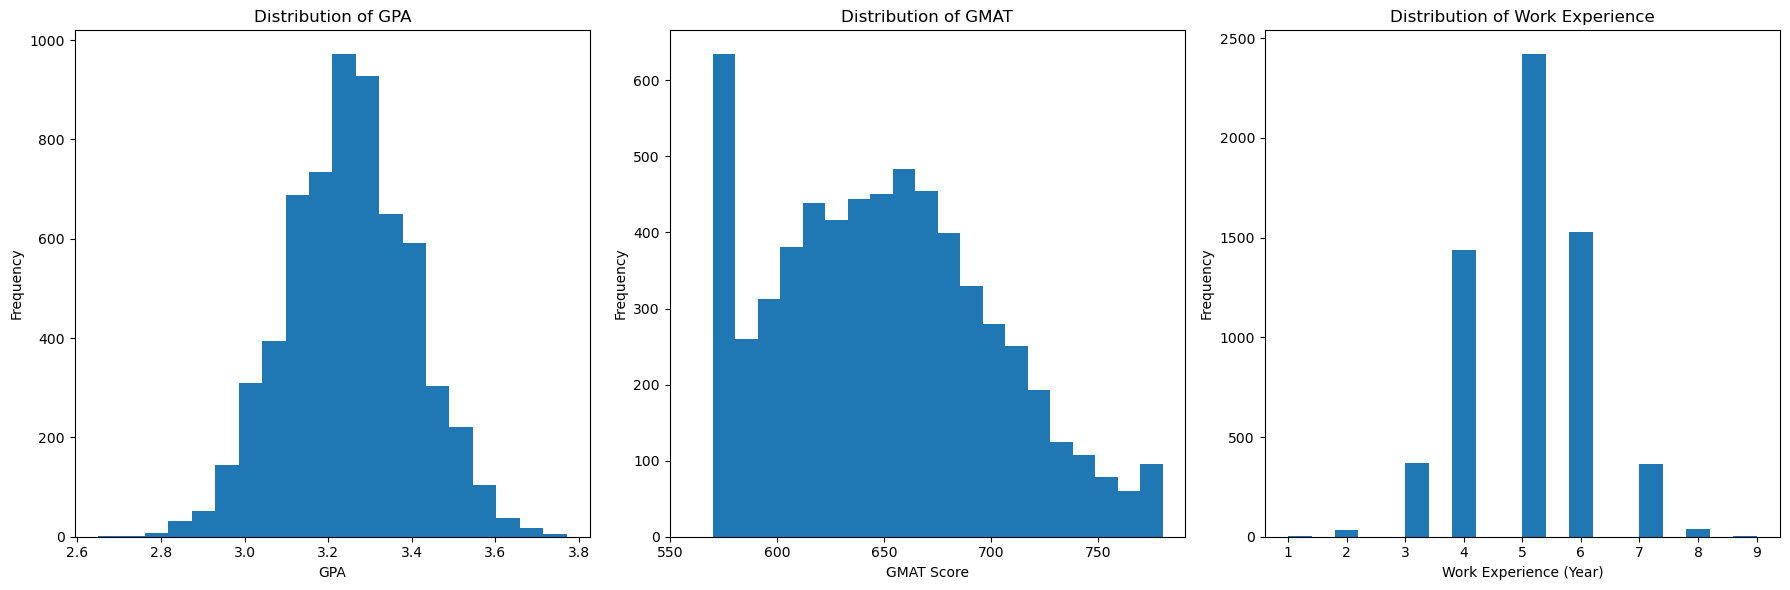

In [5]:
# Distribution of GPA, GMAT, and work experience
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# GPA
axs[0].hist(df['gpa'], bins=20)
axs[0].set_title('Distribution of GPA')
axs[0].set_xlabel('GPA')
axs[0].set_ylabel('Frequency')
#axs[0].set_xticks(np.arange(2.6, 3.9, 0.2))

# GMAT
axs[1].hist(df['gmat'], bins=20)
axs[1].set_title('Distribution of GMAT')
axs[1].set_xlabel('GMAT Score')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(np.arange(550, 800, 50))

# work experience
axs[2].hist(df['work_exp'], bins=20)
axs[2].set_title('Distribution of Work Experience')
axs[2].set_xlabel('Work Experience (Year)')
axs[2].set_ylabel('Frequency')
axs[2].set_xticks(np.arange(1, 10, 1))

plt.tight_layout()
plt.show()

#### outliers

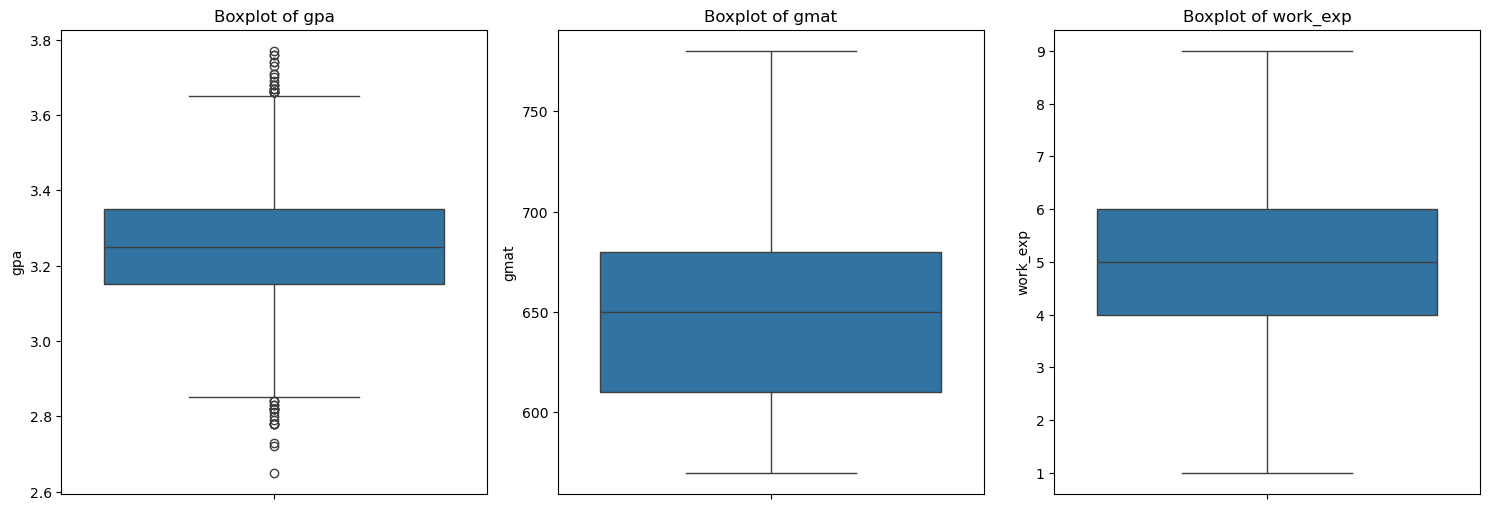

In [6]:
numerical_cols = ['gpa', 'gmat', 'work_exp']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### b. Category Variable

/var/folders/wp/3pw7jw9579b3fj4d_kd_cdxc0000gn/T/ipykernel_79032/4275828259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission', ax=axs[1], palette=colors)


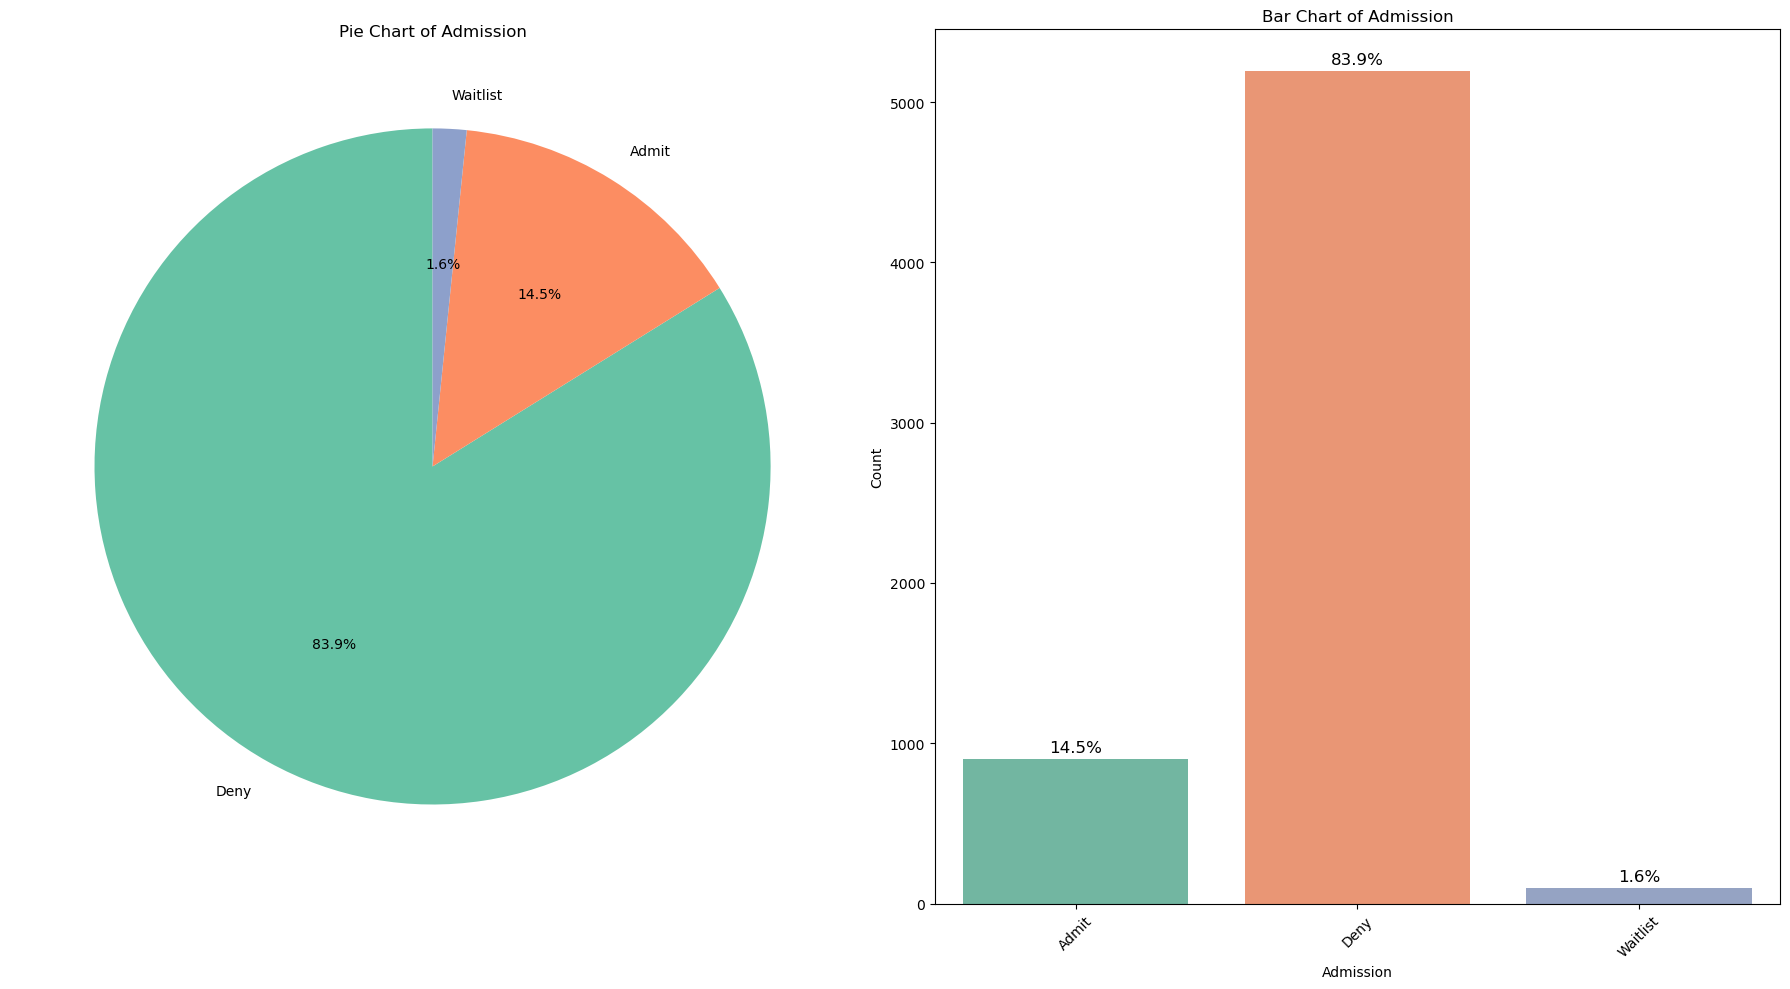

In [7]:

colors = sns.color_palette('Set2', len(df['admission'].unique()))

# Admission
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

df['admission'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Pie Chart of Admission')
axs[0].set_ylabel('')

sns.countplot(data=df, x='admission', ax=axs[1], palette=colors)
axs[1].set_title('Bar Chart of Admission')
axs[1].set_xlabel('Admission')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

total = len(df['admission'])  
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    axs[1].annotate(percentage,                       
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='baseline',       
                    fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  

plt.tight_layout()
plt.show()


/var/folders/wp/3pw7jw9579b3fj4d_kd_cdxc0000gn/T/ipykernel_79032/2077874661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axs[1, 0], palette=colors_gender)
/var/folders/wp/3pw7jw9579b3fj4d_kd_cdxc0000gn/T/ipykernel_79032/2077874661.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='international', ax=axs[1, 1], palette=colors_international)
/var/folders/wp/3pw7jw9579b3fj4d_kd_cdxc0000gn/T/ipykernel_79032/2077874661.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='major', ax=a

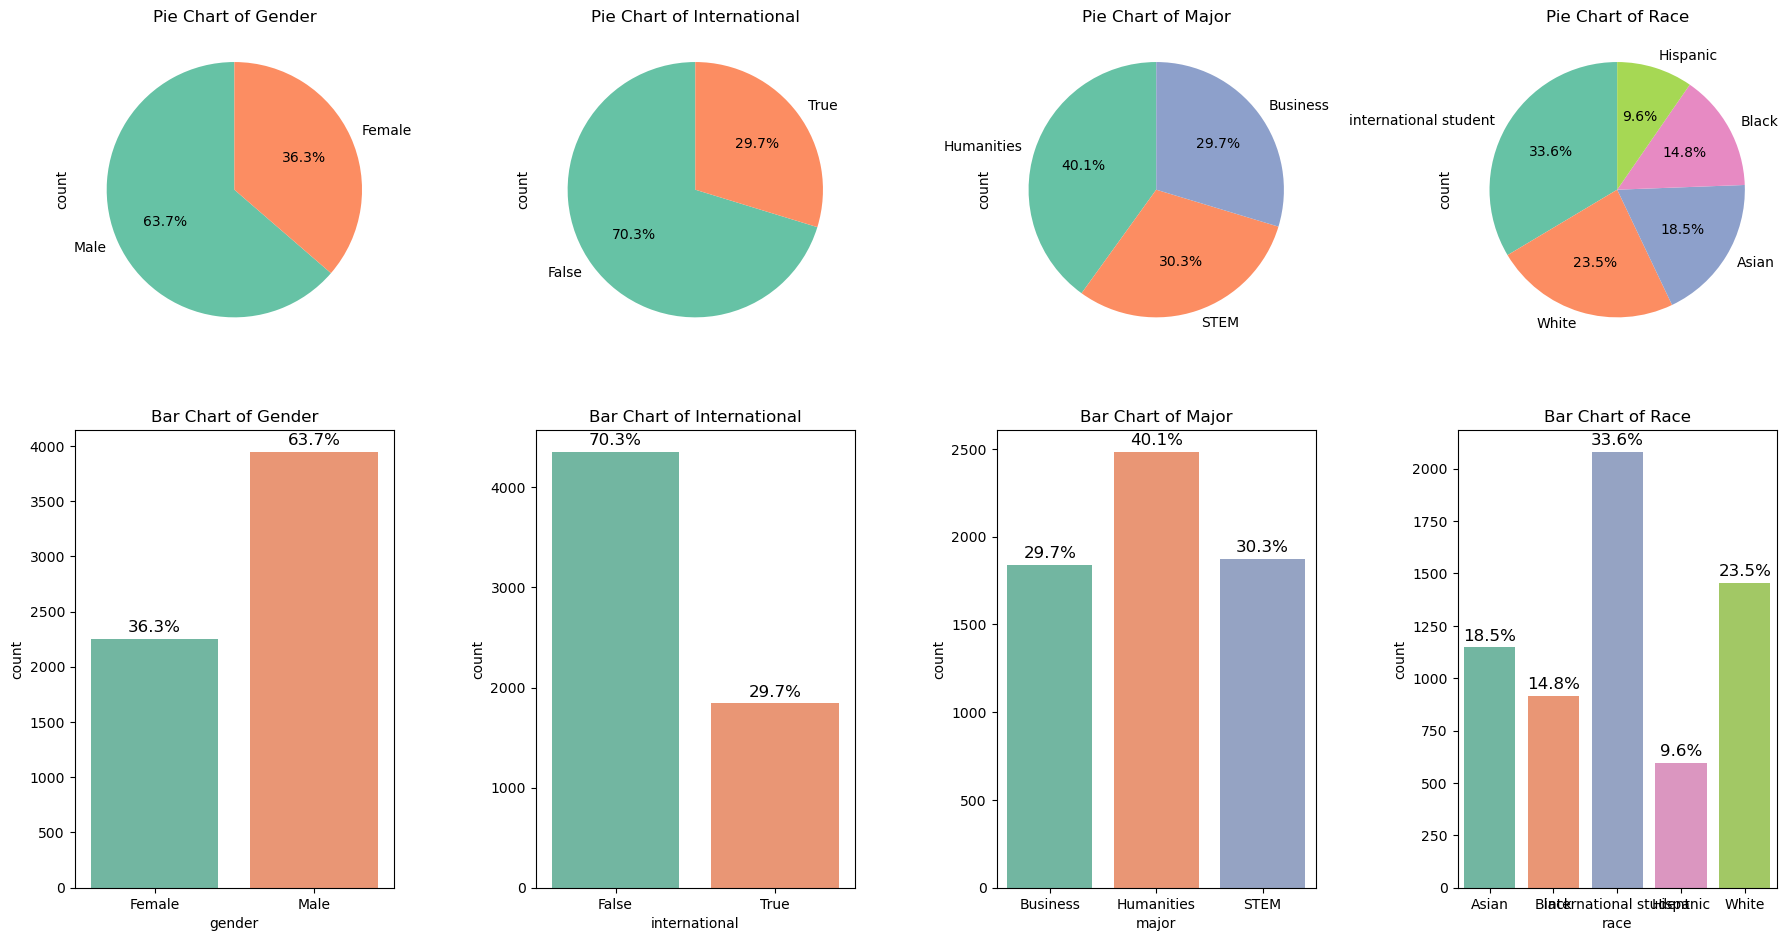

In [8]:

colors_gender = sns.color_palette('Set2', len(df['gender'].unique()))
colors_international = sns.color_palette('Set2', len(df['international'].unique()))
colors_major = sns.color_palette('Set2', len(df['major'].unique()))
colors_race = sns.color_palette('Set2', len(df['race'].unique()))

fig, axs = plt.subplots(2, 4, figsize=(18, 10))

# Gender
df['gender'].value_counts().plot.pie(ax=axs[0, 0], autopct='%1.1f%%', startangle=90, colors=colors_gender)
axs[0, 0].set_title('Pie Chart of Gender')
sns.countplot(data=df, x='gender', ax=axs[1, 0], palette=colors_gender)
axs[1, 0].set_title('Bar Chart of Gender')

total_gender = len(df['gender'])
for p in axs[1, 0].patches:
    percentage = f'{100 * p.get_height() / total_gender:.1f}%'
    axs[1, 0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# International
df['international'].value_counts().plot.pie(ax=axs[0, 1], autopct='%1.1f%%', startangle=90, colors=colors_international)
axs[0, 1].set_title('Pie Chart of International')
sns.countplot(data=df, x='international', ax=axs[1, 1], palette=colors_international)
axs[1, 1].set_title('Bar Chart of International')

total_international = len(df['international'])
for p in axs[1, 1].patches:
    percentage = f'{100 * p.get_height() / total_international:.1f}%'
    axs[1, 1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Major
df['major'].value_counts().plot.pie(ax=axs[0, 2], autopct='%1.1f%%', startangle=90, colors=colors_major)
axs[0, 2].set_title('Pie Chart of Major')
sns.countplot(data=df, x='major', ax=axs[1, 2], palette=colors_major)
axs[1, 2].set_title('Bar Chart of Major')

total_major = len(df['major'])
for p in axs[1, 2].patches:
    percentage = f'{100 * p.get_height() / total_major:.1f}%'
    axs[1, 2].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Race
df['race'].value_counts().plot.pie(ax=axs[0, 3], autopct='%1.1f%%', startangle=90, colors=colors_race)
axs[0, 3].set_title('Pie Chart of Race')
sns.countplot(data=df, x='race', ax=axs[1, 3], palette=colors_race)
axs[1, 3].set_title('Bar Chart of Race')

total_race = len(df['race'])
for p in axs[1, 3].patches:
    percentage = f'{100 * p.get_height() / total_race:.1f}%'
    axs[1, 3].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


/var/folders/wp/3pw7jw9579b3fj4d_kd_cdxc0000gn/T/ipykernel_79032/3705160531.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='work_industry', ax=axs[1], palette=colors)


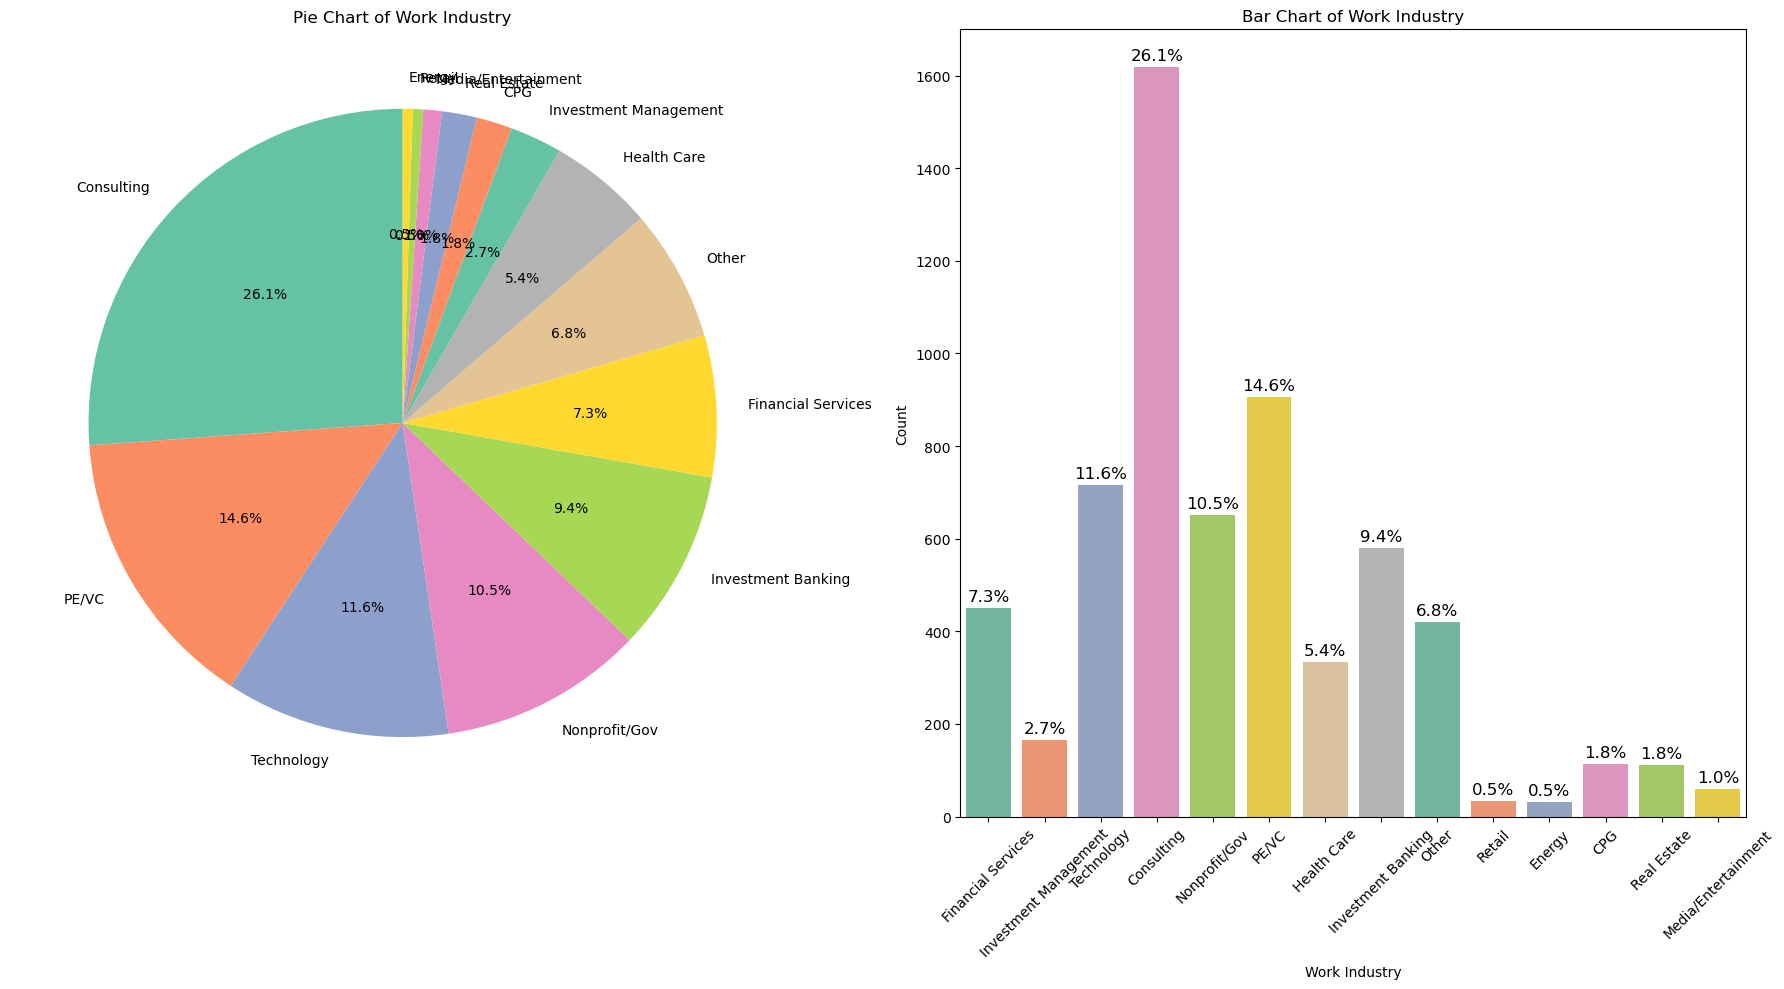

In [9]:

colors = sns.color_palette('Set2', len(df['work_industry'].unique()))

# Work Industry
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

df['work_industry'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Pie Chart of Work Industry')
axs[0].set_ylabel('')

sns.countplot(data=df, x='work_industry', ax=axs[1], palette=colors)
axs[1].set_title('Bar Chart of Work Industry')
axs[1].set_xlabel('Work Industry')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

total = len(df['work_industry'])  
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    axs[1].annotate(percentage,                       
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='baseline',       
                    fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  

plt.tight_layout()
plt.show()


## 3. Bivariate Analysis


### a. Heat map of the correlation between variables

In [10]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


The absolute value of the correlation between the numerical variables is not very large and the possibility of multicollinearity is low.

### b. VIF

In [12]:
# Encode the variables
categorical_cols = df_filtered.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Category variables are uniquely thermally encoded using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])

# Combine encoded data with numeric variables
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))
numerical_df = df_filtered[numerical_cols].reset_index(drop=True)
df_encoded = pd.concat([numerical_df, encoded_categorical_df], axis=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = df_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

print(vif_data)


                                Feature         VIF
0                                   gpa  347.388432
1                                  gmat  276.417112
2                              work_exp   23.758790
3                           gender_Male    2.819549
4                    international_True    8.800006
5                      major_Humanities    2.347585
6                            major_STEM    2.021905
7                            race_Black    1.809340
8                         race_Hispanic    1.524657
9                            race_White    2.261542
10           race_international student   10.598122
11             work_industry_Consulting   14.049647
12                 work_industry_Energy    1.265218
13     work_industry_Financial Services    4.628314
14            work_industry_Health Care    3.717443
15     work_industry_Investment Banking    5.678102
16  work_industry_Investment Management    2.332968
17    work_industry_Media/Entertainment    1.481428
18          

- gpa and gmat have extremely high VIFs (347.39 and 276.42), suggesting that these two features are highly collinear with other features or each other.

- work_exp also has a VIF of 23.76, which is quite high, indicating potential multicollinearity with other features.

- Some categorical features, like international_True (VIF = 8.80) and work_industry_Consulting (VIF = 14.05), also exhibit relatively high VIFs. This suggests that these features might also be involved in multicollinearity.



## 4. Relationship with Admission Decision

In [13]:
df_filtered.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


### a. Categorical Features

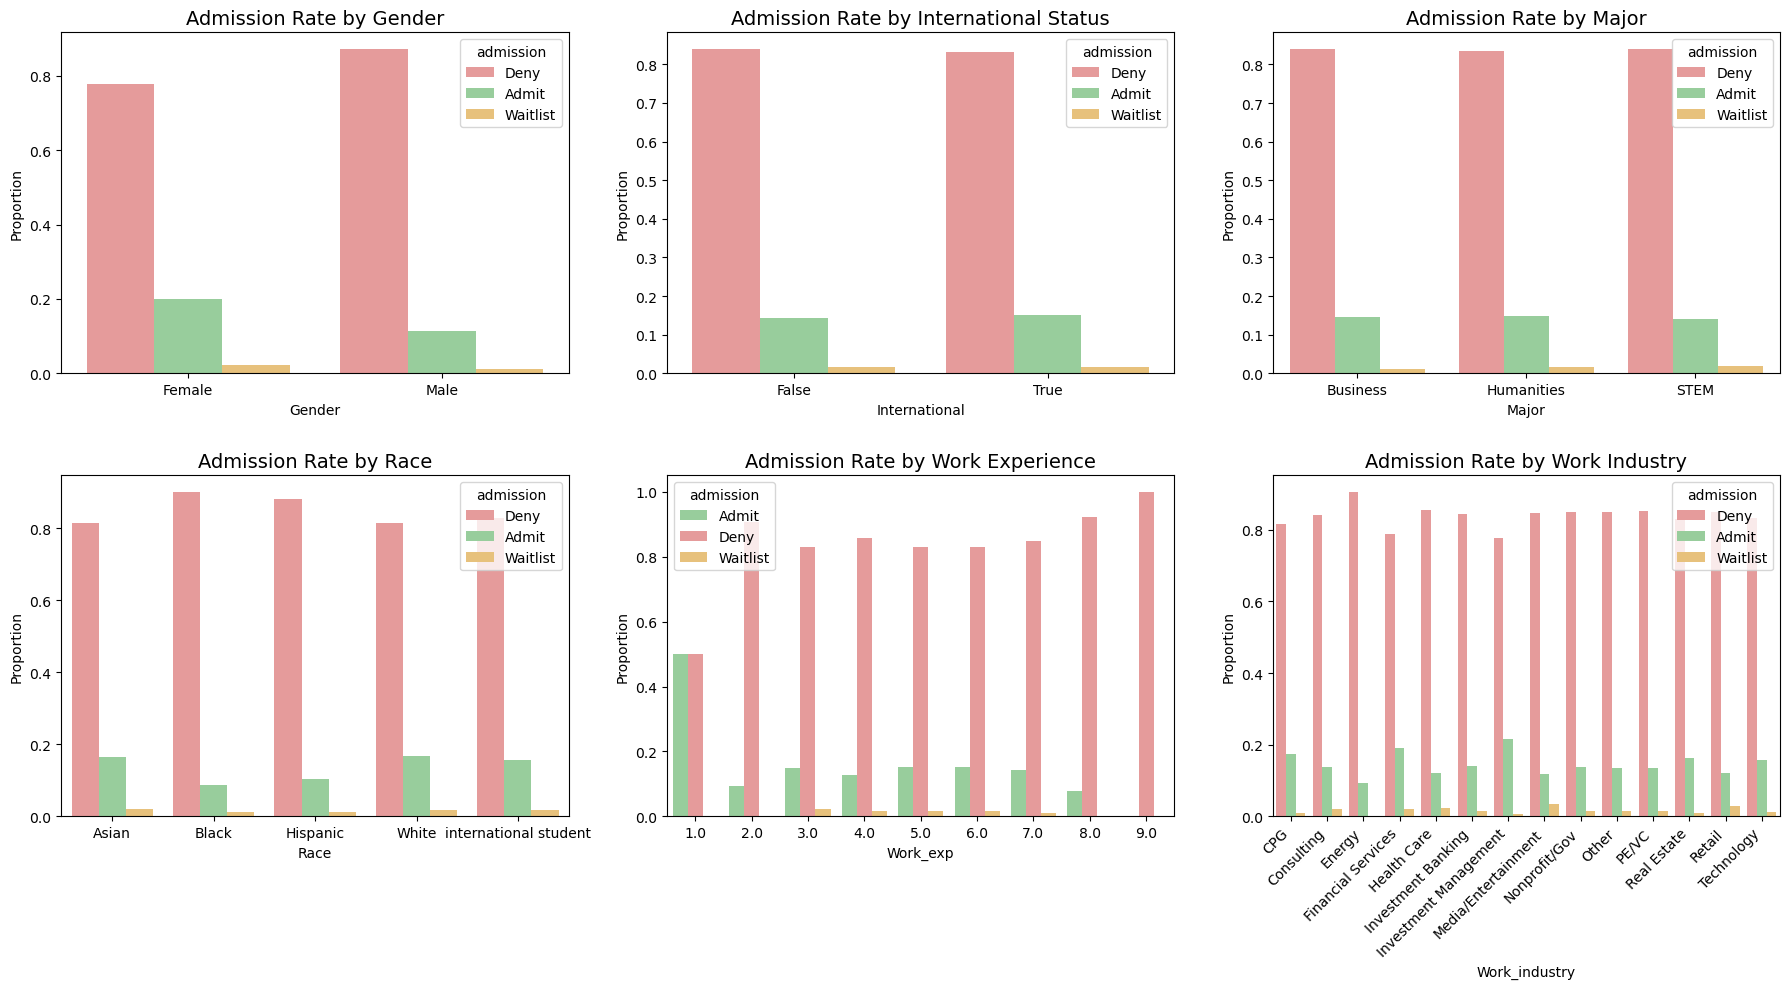

In [14]:
custom_palette = {
    'Admit': '#8fd694',   # Soft green
    'Deny': '#f28e8e',    # Muted red
    'Waitlist': '#f9c66a' # Pastel orange
}

columns_to_plot = ['gender', 'international', 'major', 'race', 'work_exp', 'work_industry']
titles = ['Admission Rate by Gender', 'Admission Rate by International Status', 'Admission Rate by Major',
          'Admission Rate by Race', 'Admission Rate by Work Experience', 'Admission Rate by Work Industry']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust size for clarity
axes = axes.flatten()

# Plot each of the specified columns
for i, column in enumerate(columns_to_plot):
    # Calculate proportions for each admission outcome within each column
    admission_rate = (
        df_filtered.groupby(column)['admission']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )
    
    sns.barplot(x=column, y='proportion', hue='admission', data=admission_rate, palette=custom_palette, ax=axes[i])
    
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Proportion')
    if column == 'work_industry':
        axes[i].tick_params(axis='x', rotation=45)  # Rotates the x-axis labels
        # Set x-ticks to show all unique categories
        axes[i].set_xticks(range(len(admission_rate[column].unique())))
        axes[i].set_xticklabels(admission_rate[column].unique(), rotation=45, ha='right')



plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

### b. Numerical Features

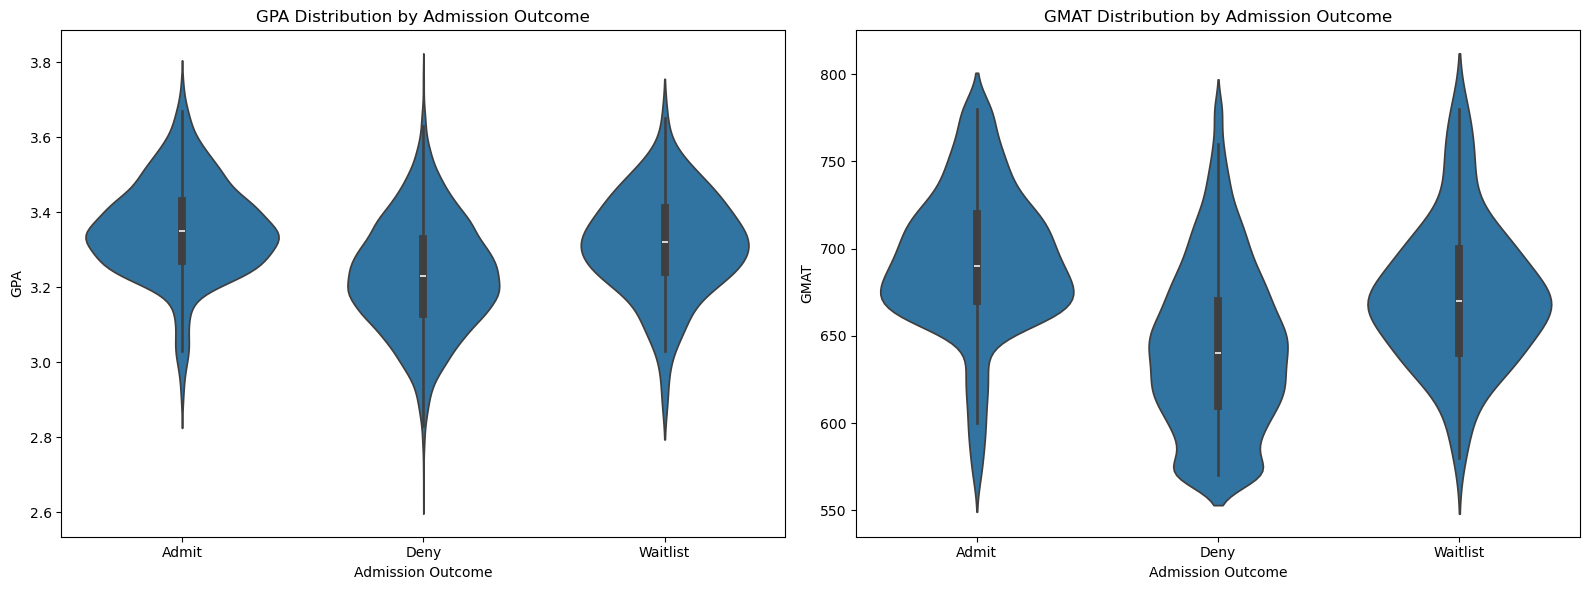

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the size for clarity

# Violin plot for GPA vs. Admission
sns.violinplot(x='admission', y='gpa', data=df_filtered, ax=axes[0])
axes[0].set_title('GPA Distribution by Admission Outcome')
axes[0].set_xlabel('Admission Outcome')
axes[0].set_ylabel('GPA')

# Violin plot for GMAT vs. Admission
sns.violinplot(x='admission', y='gmat', data=df_filtered, ax=axes[1])
axes[1].set_title('GMAT Distribution by Admission Outcome')
axes[1].set_xlabel('Admission Outcome')
axes[1].set_ylabel('GMAT')


plt.tight_layout()
plt.show()

### c. How race and gender affect the distributions of gpa and gmat w.r.t admission decision

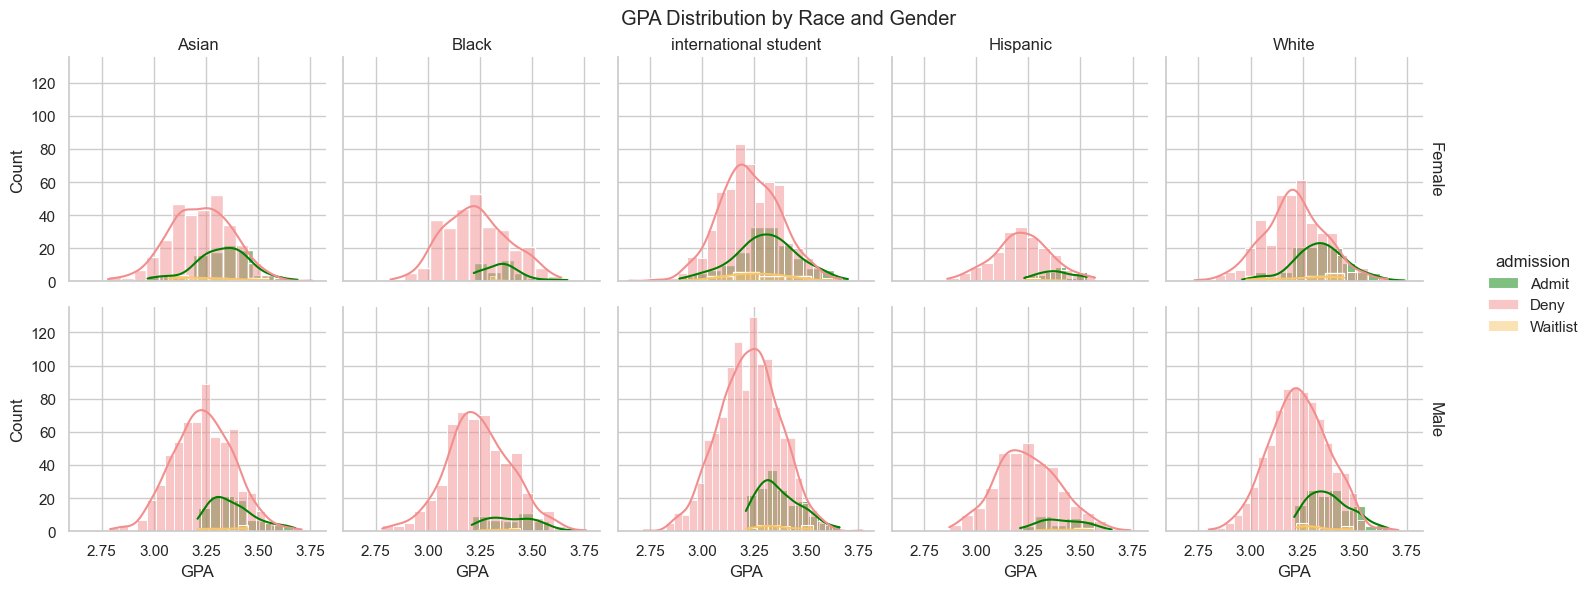

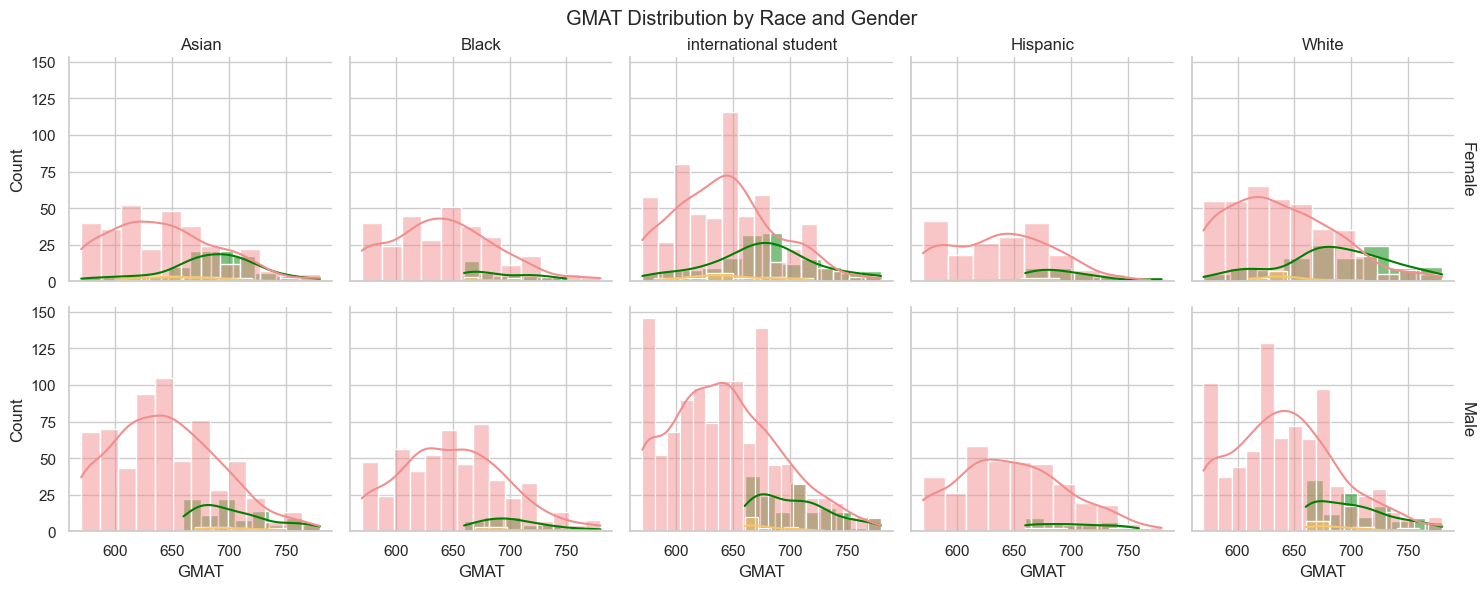

In [16]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
custom_palette_2 = {
    'Admit': 'green',   # Soft green
    'Deny': '#f28e8e',    # Muted red
    'Waitlist': '#f9c66a' # Pastel orange
}
# Create a FacetGrid for GPA by combinations of race and gender
gpa_grid = sns.FacetGrid(df_filtered, col="race", row="gender", hue="admission", palette=custom_palette_2, margin_titles=True)
gpa_grid.map(sns.histplot, "gpa", kde=True)
gpa_grid.add_legend()
gpa_grid.set_axis_labels('GPA', 'Count')
gpa_grid.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.subplots_adjust(top=0.9)
gpa_grid.fig.suptitle('GPA Distribution by Race and Gender')

plt.show()

# Create a FacetGrid for GMAT by combinations of race and gender
gmat_grid = sns.FacetGrid(df_filtered, col="race", row="gender", hue="admission", palette=custom_palette_2, margin_titles=True)
gmat_grid.map(sns.histplot, "gmat", kde=True)
gpa_grid.add_legend()  # Add legend with custom palette
gmat_grid.set_axis_labels('GMAT', 'Count')
gmat_grid.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.subplots_adjust(top=0.9)
gmat_grid.fig.suptitle('GMAT Distribution by Race and Gender')

plt.show()


### d. Visualizing Admission Outcomes by Race, Gender, and Academic Focus

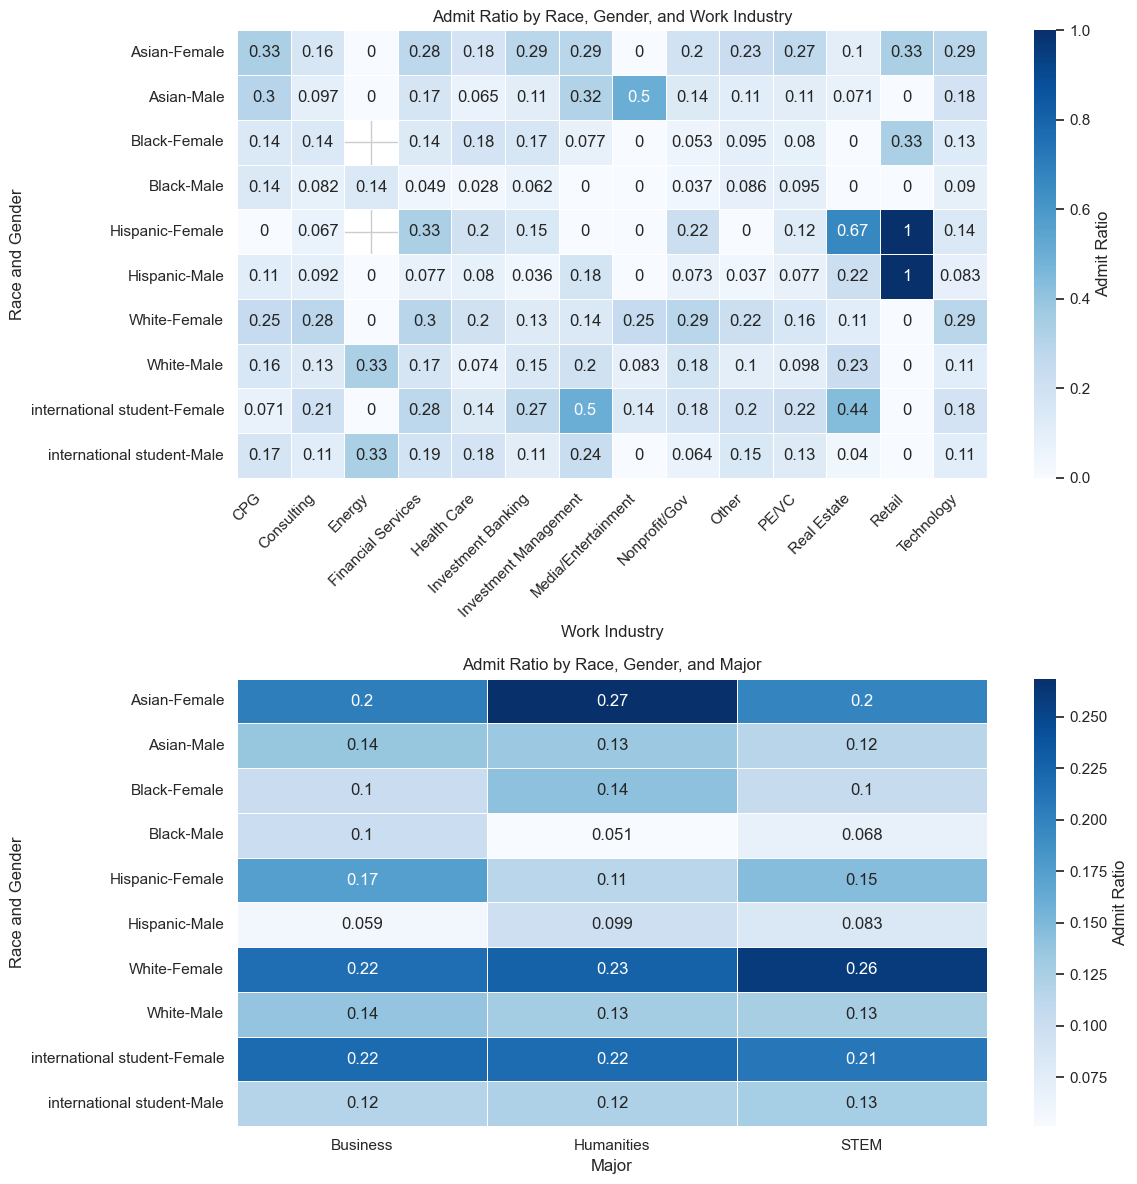

In [22]:
# Calculate the admit counts for major
admit_counts_major = (
    df_filtered.groupby(['race', 'gender', 'major', 'admission'])
    .size()
    .reset_index(name='count') 
)
total_counts_major = (
    admit_counts_major.groupby(['race', 'gender', 'major'])
    .agg(total=('count', 'sum'))
    .reset_index()
)
admit_counts_major = admit_counts_major[admit_counts_major['admission'] == 'Admit']
admit_counts_major = admit_counts_major[['race', 'gender', 'major', 'count']]
admit_counts_major = admit_counts_major.rename(columns={'count': 'admit_count'})

admit_ratios_major = pd.merge(total_counts_major, admit_counts_major, on=['race', 'gender', 'major'], how='left')
admit_ratios_major['admit_ratio'] = admit_ratios_major['admit_count'] / admit_ratios_major['total'] 
admit_ratios_major.fillna(0, inplace=True)

# Generate heatmap data for major
heatmap_data_major = admit_ratios_major.pivot_table(index=['race', 'gender'], columns='major', values='admit_ratio')


# Calculate the admit counts for work industry
admit_counts_industry = (
    df_filtered.groupby(['race', 'gender', 'work_industry', 'admission'])
    .size()
    .reset_index(name='count') 
)
total_counts_industry = (
    admit_counts_industry.groupby(['race', 'gender', 'work_industry'])
    .agg(total=('count', 'sum')) 
    .reset_index()
)
admit_counts_industry = admit_counts_industry[admit_counts_industry['admission'] == 'Admit'] 
admit_counts_industry = admit_counts_industry[['race', 'gender', 'work_industry', 'count']] 
admit_counts_industry = admit_counts_industry.rename(columns={'count': 'admit_count'})

admit_ratios_industry = pd.merge(total_counts_industry, admit_counts_industry, on=['race', 'gender', 'work_industry'], how='left')
admit_ratios_industry['admit_ratio'] = admit_ratios_industry['admit_count'] / admit_ratios_industry['total']  # Calculate admit ratio
admit_ratios_industry.fillna(0, inplace=True)  

# Generate heatmap data for work industry
heatmap_data_industry = admit_ratios_industry.pivot_table(index=['race', 'gender'], columns='work_industry', values='admit_ratio')



plt.figure(figsize=(12, 12))

# Heatmap for Admit Ratio by Race, Gender, and Work Industry
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.heatmap(heatmap_data_industry,
            annot=True, cmap='Blues', cbar_kws={'label': 'Admit Ratio'}, linewidths=.5)
plt.title('Admit Ratio by Race, Gender, and Work Industry')
plt.xlabel('Work Industry')
plt.ylabel('Race and Gender')
plt.xticks(rotation=45, ha='right')

# Heatmap for Admit Ratio by Race, Gender, and Major
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.heatmap(heatmap_data_major,
            annot=True, cmap='Blues', cbar_kws={'label': 'Admit Ratio'}, linewidths=.5)
plt.title('Admit Ratio by Race, Gender, and Major')
plt.xlabel('Major')
plt.ylabel('Race and Gender')

plt.tight_layout() 
plt.show()